# Feedback-driven Quantum Reservoir Computing
- **Author:** Dominika Nowak
- **Date:** Sept 2025
- **Based on the work presented in the paper:**<br>
  Kobayashi, K., Fujii, K., Yamamoto, N., 2024. Feedback-Driven Quantum Reservoir Computing for Time-Series Analysis.<br>
  PRX Quantum 5, 040325. https://doi.org/10.1103/PRXQuantum.5.040325

In [1]:
import sys
sys.path.append('.')
sys.path

['/home/jacob/miniconda3/envs/pl-cuda12/lib/python311.zip',
 '/home/jacob/miniconda3/envs/pl-cuda12/lib/python3.11',
 '/home/jacob/miniconda3/envs/pl-cuda12/lib/python3.11/lib-dynload',
 '',
 '/home/jacob/miniconda3/envs/pl-cuda12/lib/python3.11/site-packages',
 '.']

In [2]:
from datasets.mackey_glass import MackeyGlassDataset
from models.feedbackDriven import FeedbackDrivenQRC

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error

# using Jaeger's preset
dataset = MackeyGlassDataset(preset="jaeger_tau17", length=3000, seed=42)
series = dataset.generate()

# train/test split
train_frac = 0.7
split = int(len(series) * train_frac)
y_train, y_test = series[:split], series[split:]

# Preparing X,y for one-step ahead
X_train = np.arange(y_train.shape[0]).reshape(-1, 1)
X_test = (np.arange(y_test.shape[0])+y_train.shape[0]).reshape(-1, 1)

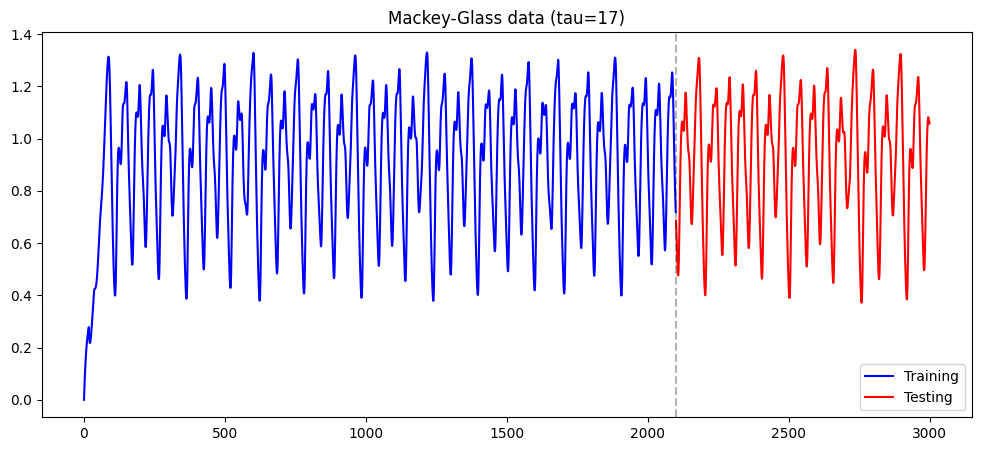

In [3]:
plt.figure(figsize=(12,5))
plt.plot(X_train, y_train, color="blue", label="Training")
plt.plot(X_test, y_test, color="red", label="Testing")
plt.axvline(x=X_train.shape[0], color='black', alpha=0.3, linestyle='--')
plt.legend()
plt.title("Mackey-Glass data (tau=17)")
plt.show()

In [4]:
# -----------------------------
# 3) FeedbackDrivenQRC
# -----------------------------

N = 8      # reservoir qubits / wires
layers=7   # reservoir layers
ain=1e-3   # input scaling
afb=2.5    # feedback scaling
warmup=500 # initial "warmup" sequence
ltr = 1500 # remaining sequence, where: warmup+ltr < len(sequence)

In [5]:
# Create and fit the reservoir model
fb_model = FeedbackDrivenQRC(N=N, layers=layers, ain=ain, afb=afb)
fb_model.fit(y_train, y=y_train, warmup=warmup, ltr=ltr)

In [6]:
# Evaluate the model on training data
y_train_pred_fb = fb_model.predict(y_train, warmup=warmup)
y_train_true_fb = y_train[warmup:warmup+len(y_train_pred_fb)]
rmse_train_fb = root_mean_squared_error(y_train_true_fb, y_train_pred_fb)
rmse_train_fb

0.0013439957345875338

In [7]:
# Evaluate the model on test data
y_test_pred_fb = fb_model.predict(y_test, warmup=warmup)
y_test_true_fb = y_test[warmup:warmup+len(y_test_pred_fb)]
rmse_test_fb = root_mean_squared_error(y_test_true_fb, y_test_pred_fb)
rmse_test_fb

0.0013499154392920285

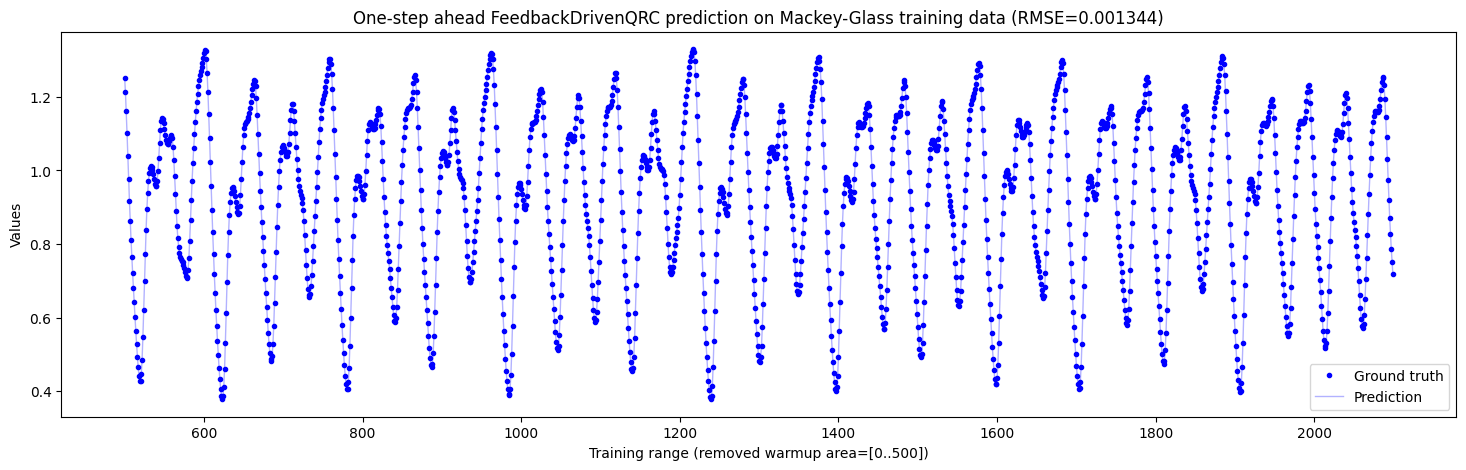

In [8]:
# ------------------------------
# 4) Evaluation on training data
# ------------------------------
plt.figure(figsize=(18,5))
plt.plot(X_train[warmup:warmup+len(y_train)], y_train[warmup:warmup+len(y_train)], label="Ground truth", color="blue", linestyle="", marker=".")
plt.plot(X_train[warmup:warmup+len(y_train_true_fb)], y_train_pred_fb, label=f"Prediction", color="blue", linewidth=1, alpha=0.3)
plt.legend()
plt.xlabel(f"Training range (removed warmup area=[0..{warmup}])")
plt.ylabel(f"Values")
plt.title(f"One-step ahead FeedbackDrivenQRC prediction on Mackey-Glass training data (RMSE={rmse_train_fb:.6f})")
plt.show()

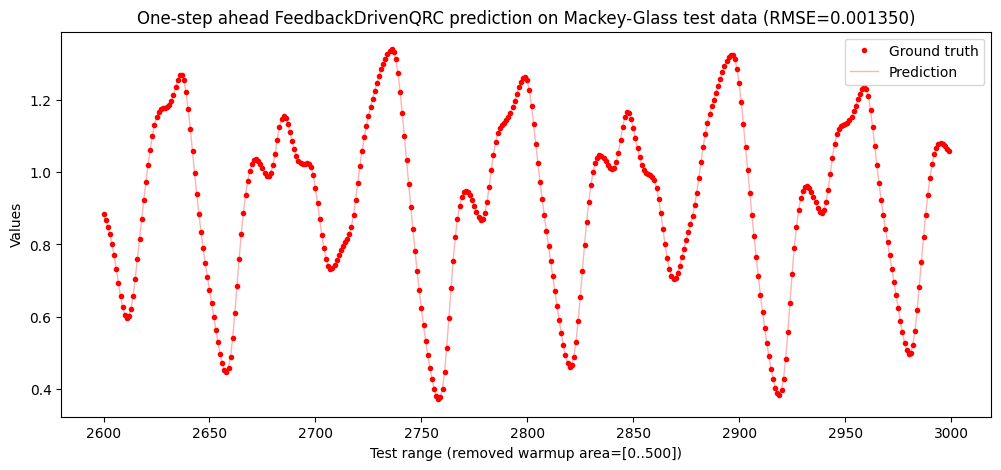

In [9]:
# --------------------------
# 5) Evaluation on test data
# --------------------------
plt.figure(figsize=(12,5))
plt.plot(X_test[warmup:warmup+len(y_test)], y_test[warmup:warmup+len(y_test)], label="Ground truth", color="red", linestyle="", marker=".")
plt.plot(X_test[warmup:warmup+len(y_test_true_fb)], y_test_pred_fb, label=f"Prediction", color="red", linewidth=1, alpha=0.3)
plt.legend()
plt.xlabel(f"Test range (removed warmup area=[0..{warmup}])")
plt.ylabel(f"Values")
plt.title(f"One-step ahead FeedbackDrivenQRC prediction on Mackey-Glass test data (RMSE={rmse_test_fb:.6f})")
plt.show()

# Software in use (Linux)

In [10]:
import os
os.system('pip list | grep -e PennyLane');

PennyLane                 0.40.0
PennyLane_Lightning       0.40.0
PennyLane_Lightning_GPU   0.40.0
PennyLane-Rigetti         0.40.0
